<a href="https://colab.research.google.com/github/GirishaMalni/Climate-change-impacts-on-global-food-supply/blob/main/Climate_change_impacts_on_global_food_supply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Food_Production.csv")

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [ ]:
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include='float64').columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


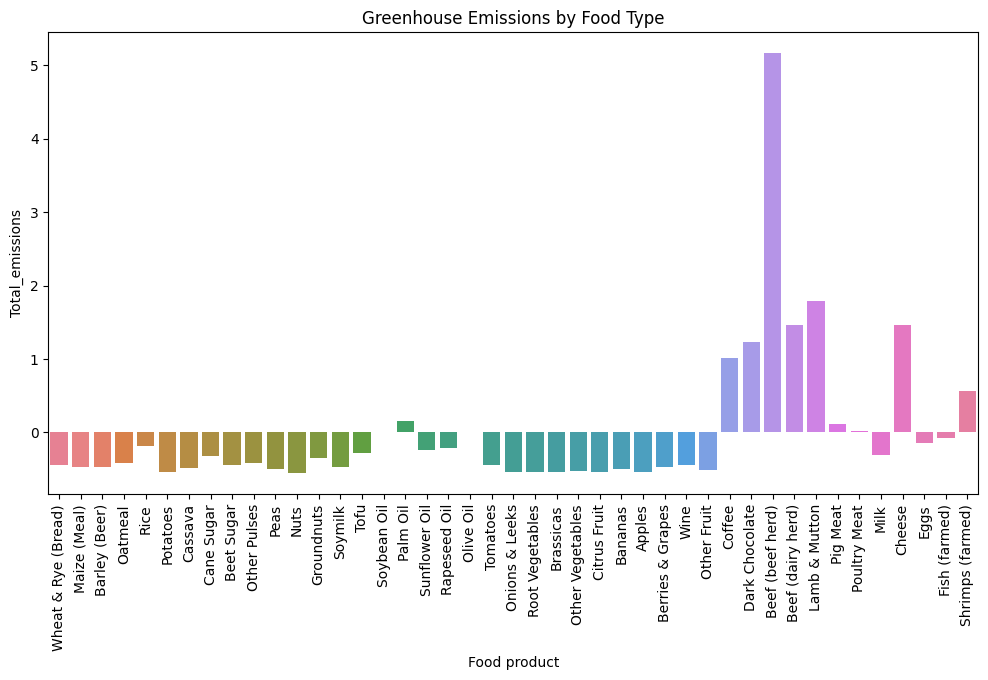

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Food product", y="Total_emissions", hue="Food product")
plt.xticks(rotation=90)
plt.title("Greenhouse Emissions by Food Type")
plt.show()

In [ ]:
X = data[['Total_emissions', 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
          'Freshwater withdrawals per kilogram (liters per kilogram)', 'Land use per kilogram (m² per kilogram)']]
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
X_imputed = imputer.fit_transform(X)

# Now use the imputed data for KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_imputed)

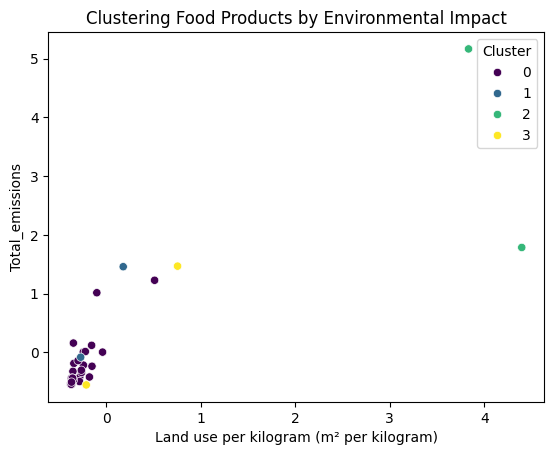

In [ ]:
sns.scatterplot(data=data, x="Land use per kilogram (m² per kilogram)", y="Total_emissions", hue="Cluster", palette="viridis")
plt.title("Clustering Food Products by Environmental Impact")
plt.show()

In [ ]:
X = data[['Land use per kilogram (m² per kilogram)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram (liters per kilogram)']]
y = data['Total_emissions']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.5155490318601166


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


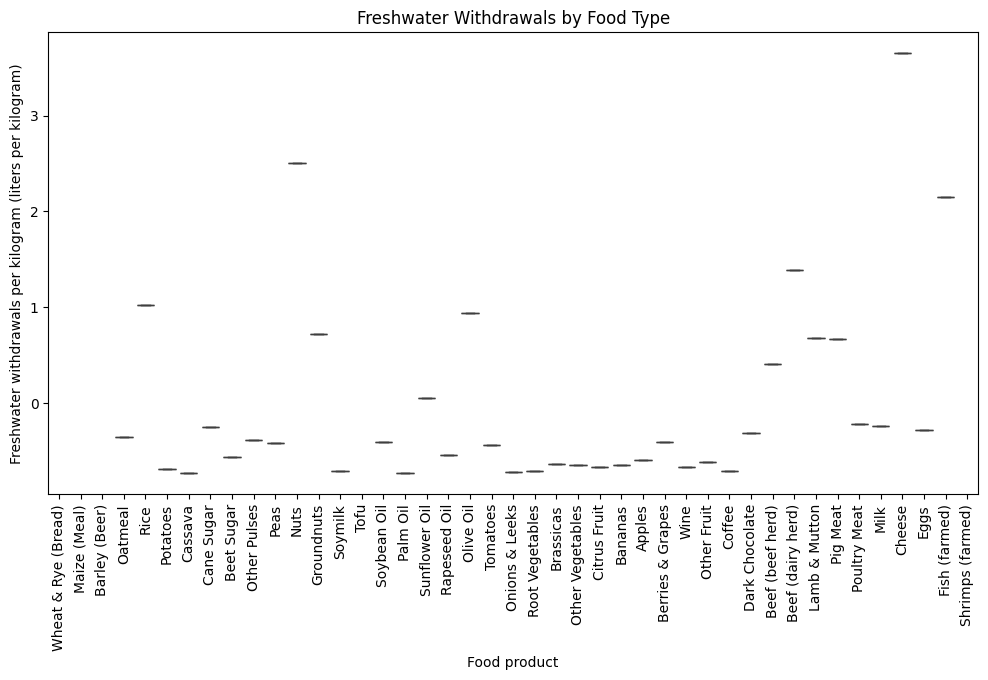

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Food product", y="Freshwater withdrawals per kilogram (liters per kilogram)")
plt.title("Freshwater Withdrawals by Food Type")
plt.xticks(rotation=90)
plt.show()

In [ ]:
high_emission_threshold = data["Total_emissions"].quantile(0.75)  # Top 25%
low_emission_threshold = data["Total_emissions"].quantile(0.25)

In [ ]:
high_emission = data[data["Total_emissions"] >= high_emission_threshold]
low_emission = data[data["Total_emissions"] <= low_emission_threshold]

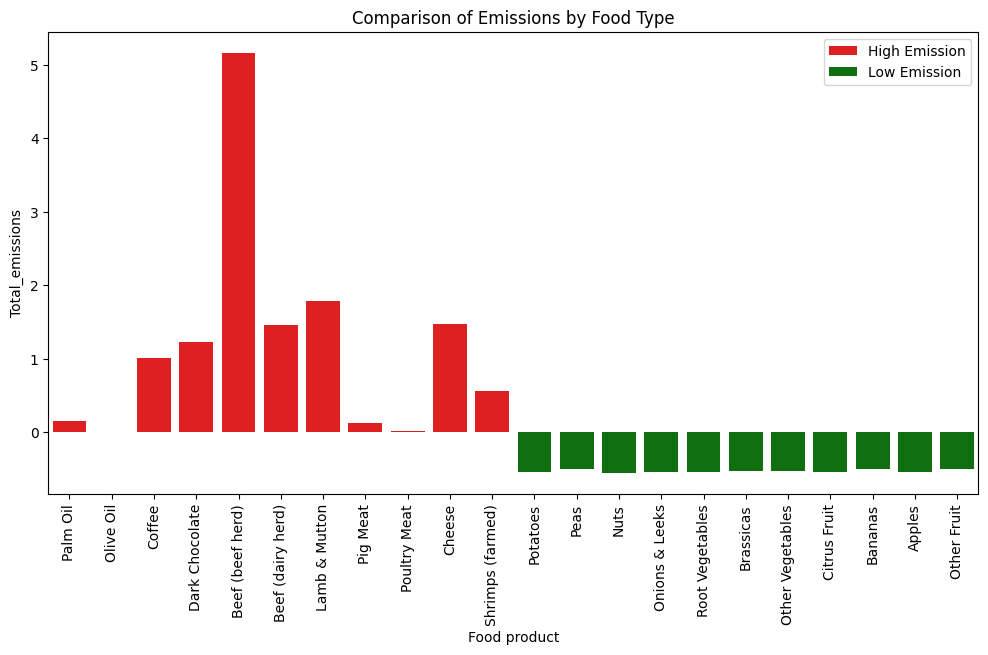

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=high_emission["Food product"], y=high_emission["Total_emissions"], color="red", label="High Emission")
sns.barplot(x=low_emission["Food product"], y=low_emission["Total_emissions"], color="green", label="Low Emission")
plt.xticks(rotation=90)
plt.title("Comparison of Emissions by Food Type")
plt.legend()
plt.show()